Mean of X1=  40.371115600000024
Mean of X2=  97.83115999999994
Mean of X3=  150.10245333333322
Mean of X4=  234.0766333333334
Mean of X5=  270.21036666666674
***************************************
Variance of X1=  317.1666478839704
Variance of X2=  313.77130760642143
Variance of X3=  284.50412926537336
Variance of X4=  316.84342842697873
Variance of X5=  278.6509614035675
***************************************


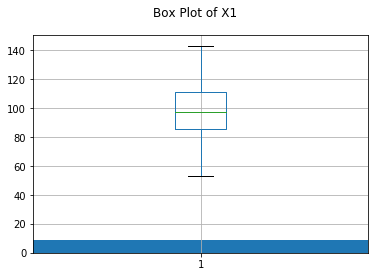

In [95]:
# Task 1 -- Basic Statistical Analysis

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from pathlib import Path
import pylab as pl

data_folder = Path("C:/Users/Kalyan/Desktop/NCSU/3rd Semester/IOT Analytics 592/Project2/data/")
file_to_open = data_folder / "kghosh.csv"


class Basic_Statistical_Analysis:
    
    def __init__(self,file_to_open):
        
        self.file_to_open=file_to_open
        
    
    def hist_mean_variance(self):
        
        data=pd.read_csv(file_to_open,skiprows=None,header=None)

        df = pd.DataFrame(data)
        
        X1 = df.iloc[:,0]
        X2 = df.iloc[:,1]
        X3 = df.iloc[:,2]
        X4 = df.iloc[:,3]
        X5 = df.iloc[:,4]
        
        #plot histograms
        
        hist1 = X1.hist()
        hist2 = X2.hist()
        hist3 = X3.hist()
        hist4 = X4.hist()
        hist5 = X5.hist()
        
        #pl.suptitle("Histogram")
        
        #1.1
        #calculate the mean
        
        print ("Mean of X1= ",X1.mean())
        print ("Mean of X2= ",X2.mean())
        print ("Mean of X3= ",X3.mean())
        print ("Mean of X4= ",X4.mean())
        print ("Mean of X5= ",X5.mean())
        
        #calculate the variance
        print ("***************************************")
        
        print ("Variance of X1= ",X1.var())
        print ("Variance of X2= ",X2.var())
        print ("Variance of X3= ",X3.var())
        print ("Variance of X4= ",X4.var())
        print ("Variance of X5= ",X5.var())
        
        print ("***************************************")
        
        #1.2
        #create boxplots
        X1=pd.DataFrame(X1)
        X2=pd.DataFrame(X2)
        X3=pd.DataFrame(X3)
        X4=pd.DataFrame(X4)
        X5=pd.DataFrame(X5)

        pl.suptitle("Box Plot of X1")
        pd.DataFrame(X2).boxplot()
       

obj=Basic_Statistical_Analysis(file_to_open)
obj.hist_mean_variance()
        
        